# Lead Scoring Case Study

####  Problem Statement

X Education seeks to improve its lead conversion rate, which is currently around 30%. The company wants to identify 'Hot Leads'—the leads most likely to convert into paying customers. Given a dataset of around 9000 past leads with various attributes (e.g., Lead Source, Total Time Spent on Website) your task is to develop a model to assign a lead score to each lead. Leads with higher scores should have a higher likelihood of conversion. The target conversion rate for the model is around 80%. The dataset includes a target variable, ‘Converted’ (1 for converted, 0 for not converted), and categorical variables with some levels representing missing values.

## Importing Neccesary Libraries

In [4]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [5]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## Step 1: Reading and Understanding Data Set

In [7]:
#Reading the data
df_leads=pd.read_csv("Leads.csv")

In [8]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [9]:
df_leads.shape

(9240, 37)

In [10]:
# checking the info of the dataframe
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

> Here, we can see there are null values in the data

In [12]:
# Checking summary of all numerical columns to understand the dataset better in terms of spread
df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

> Here, we can observe some columns have outliers.

In [14]:
# Checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

> As some of the columns have only one unique value so will drop these columns.

In [16]:
# Checking for duplicate rows
print(df_leads.duplicated().sum())

0


> So, there are no duplicate data in the dataframe df_leads

In [18]:
# Ckecking for missing value 
100*df_leads.isnull().mean().sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Step:2 Data Cleaning and Data Manipulation

In [20]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

> Here,In the given problem, some categorical variables in the dataset have a level named 'Select,' which essentially functions as a placeholder for missing or unselected data. This level indicates that the customer did not make a specific choice from the available options, leading to the data defaulting to 'Select'. Therefore, 'Select' should be treated similarly to null values because it represents a lack of meaningful data. Handling 'Select' as missing data is crucial for accurate data analysis and preprocessing.

In [22]:
# Checking for columns having "Select" as value
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [23]:
# Let's replace "select" values with "NaN"
df_leads=df_leads.replace("Select",np.nan)

In [24]:
# Again Checking for columns having "Select" as value
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


> Therefore, now there is no columns with "Select" as values.

In [26]:
# Handling missing values
100*df_leads.isnull().mean().sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

>Columns having more than 40% missing values will give irrelevant results when analysed and also imputing these missing values with mean,median and mode will not make sense, so dropping these columns will be the appropriate approach.

In [28]:
# Dropping the columns with more than 40% of missing values
cut_off=40
cols_to_drop=list(df_leads.columns[100*df_leads.isnull().mean()>cut_off])
print(cols_to_drop)
print('-'*100)
print('Number of columns to be dropped:',len(cols_to_drop))

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
----------------------------------------------------------------------------------------------------
Number of columns to be dropped: 7


In [29]:
print("Shape before dropping columns: ",df_leads.shape,"\n")
df_leads=df_leads.drop(cols_to_drop,axis=1)
print("Shape after dropping columns: ",df_leads.shape)

Shape before dropping columns:  (9240, 37) 

Shape after dropping columns:  (9240, 30)


In [30]:
# Re-checking for missing values
100*df_leads.isnull().mean().sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [31]:
# Selecting the columns with categorical missing values
cat_cols=["City","Specialization","Tags","What matters most to you in choosing a course","What is your current occupation","Country",
          "Last Activity","Lead Source"]

In [32]:
for i in cat_cols:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("*"*100,"\n")

value_counts % for : City 

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

**************************************************************************************************** 

value_counts % for : Specialization 

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Ma

> In Lead Source: "Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will `impute the missing values with label 'Google'`.

> In Last Activity: "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will `impute the missing values with label 'Email Opened'`.

> In Country: "India" is having highest number of occurences and overall null values are 26.6% . if we impute the missing values with "India",then the overall percentage of India is becoming 96.8%.So,it will be `advisable to drop this column` as maximum leads are from India which will not give any relevant result.

> Specialization: Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to `create additional category called 'Others'`.

> What is your current occupation: We can `impute the missing values with 'Unemployed'` as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

> What matters most to you in choosing a course: This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and `will not provide any insight`.So,will `drop this column`.

> Tags: Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be `dropped`.

> City: City has 39.71 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence `City column can be dropped`.


In [34]:
# Dropping the Columns "Country","What matters most to you in choosing a course ","Tags" and "City"
print("Before Drop",df_leads.shape)
df_leads=df_leads.drop(["Country","What matters most to you in choosing a course","Tags","City"],axis=1)
print("After Drop",df_leads.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


In [35]:
# Imputing the categorical missing values
missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [37]:
# Re Checking the percentage of null values for remaining columns
100*df_leads.isnull().mean().sort_values(ascending=False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Prospect ID                                 0.000000
Magazine                                    0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Newspaper Article                           0.000000
Search                                      0.000000
Lead Number                                 0.000000
What is your current occupation             0.000000
Specialization                              0.000000
Last Activity                               0.

> Since the number of null values present in the columns are quite small,we can simply drop the rows in which these null values are present.

In [39]:
# Dropping the rows having null values for "TotalVisits" and "Page Views Per Visit"
df_leads=df_leads[~pd.isnull(df_leads["TotalVisits"])]
df_leads=df_leads[~pd.isnull(df_leads["Page Views Per Visit"])]

In [40]:
# Re Checking the percentage of null values for remaining columns
100*df_leads.isnull().mean().sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

In [41]:
# Let's drop the columns "Prospect ID" and "Lead Number" as it is the unique ids given to each leads
df_leads=df_leads.drop(["Prospect ID","Lead Number"],axis=1)

In [42]:
# The value counts of all the columns
for cols in df_leads.columns:
    print(df_leads[cols].value_counts())
    print("*"*100)

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64
****************************************************************************************************
Lead Source
Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
****************************************************************************************************
Do Not Email
No     8379
Yes     724
Name: count

> Here, we can see that "Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque" ,these columns have either only one unique values or the columns having two values,one value is dominating the other .so it will be good to drop these columns.

In [44]:
df_leads=df_leads.drop(["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)

In [45]:
df_leads.shape

(9103, 11)

In [46]:
df_leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

##### Checking for Outliers

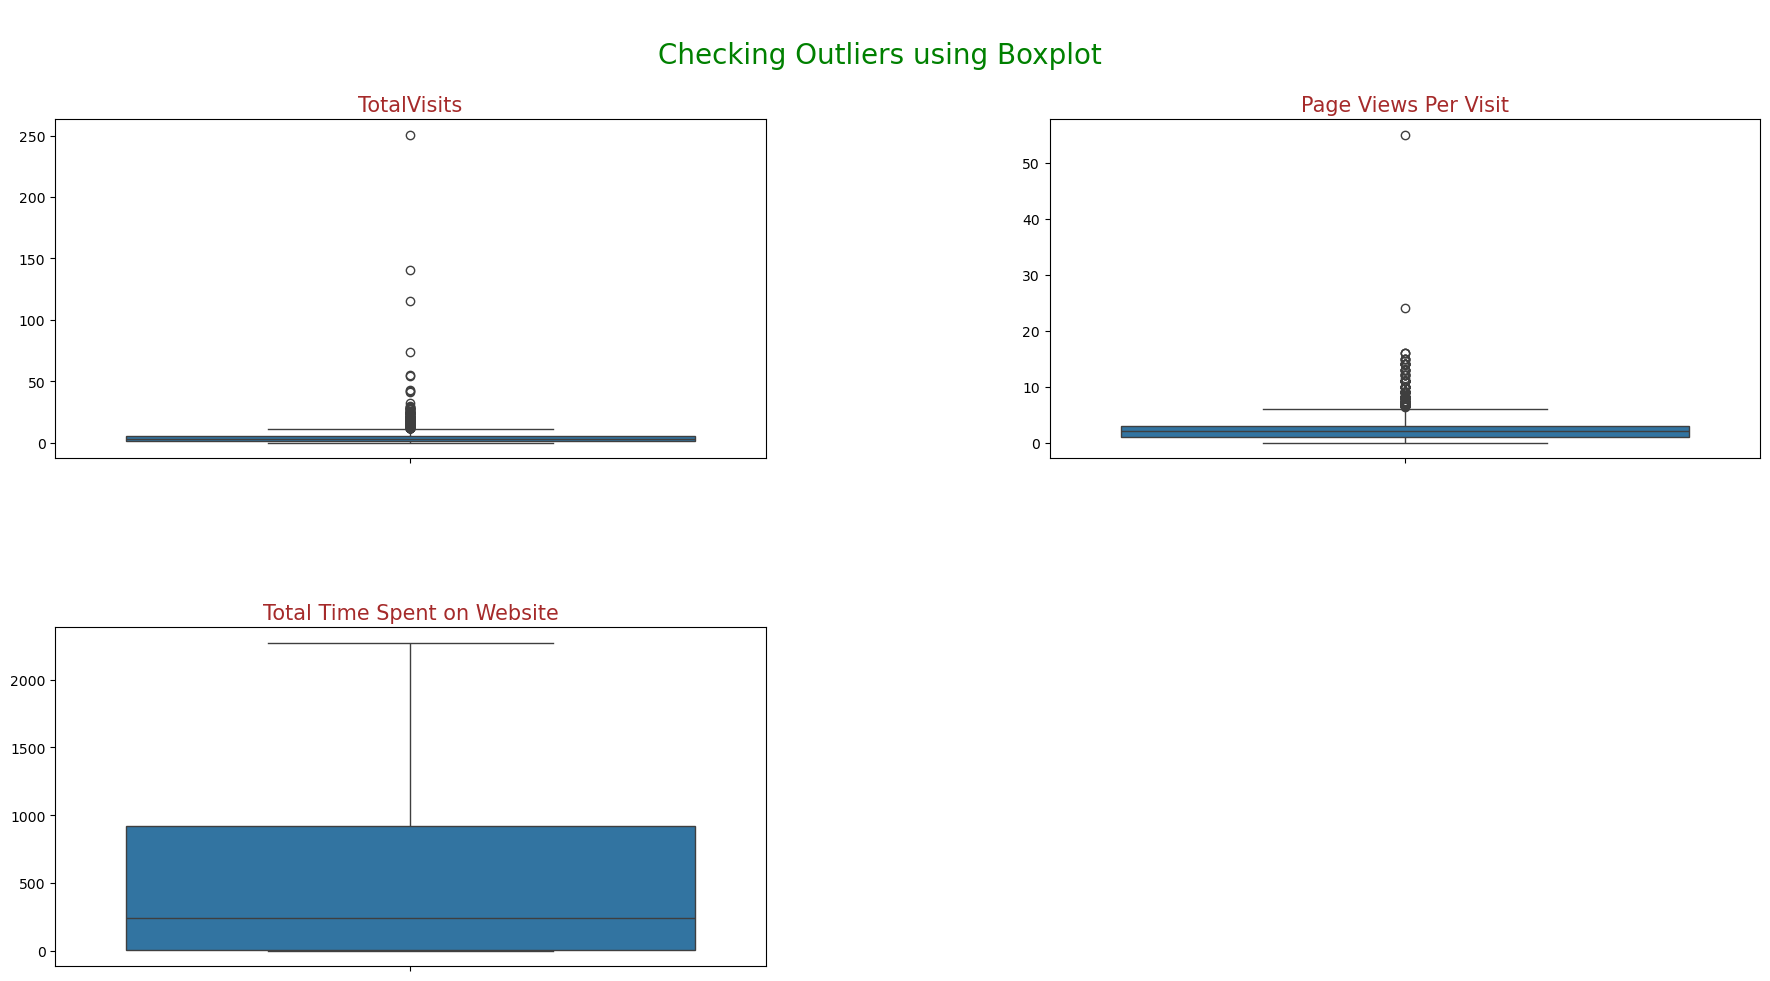

In [48]:
plt.figure(figsize=[22,11])
plt.subplots_adjust(wspace=0.4, hspace=0.5)
columnList = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
# Loop over the list of columns
for i, column_name in enumerate(columnList):
    # Create a subplot for each column
    plt.subplot(2, 2, i + 1)
    
    # Create a boxplot for the current column
    sns.boxplot(y=df_leads[column_name])
    
    # Set the title of the entire figure
    plt.suptitle("\nChecking Outliers using Boxplot", fontsize=20, color="green")
    
    # Remove the y-axis label
    plt.ylabel(None)
    
    # Set the title of the individual subplot
    plt.title(column_name, fontsize=15, color='brown')

# Show the plot
plt.show()

> Some outliers are present,So will treat them with the help capping and flooring.

In [50]:
# To treat outliers via capping and flooring
columnList = ["TotalVisits","Page Views Per Visit"]
for column_name in columnList:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = df_leads[column_name].describe()["25%"]
    q3 = df_leads[column_name].describe()["75%"]
    
    # Calculate the Interquartile Range (IQR)
    IQR = q3 - q1
    
    # Determine the upper and lower bounds for outliers
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    
    # Cap the values at the upper_bound
    df_leads[column_name] = np.where(df_leads[column_name] > upper_bound, upper_bound, df_leads[column_name])
    
    # Floor the values at the lower_bound
    df_leads[column_name] = np.where(df_leads[column_name] < lower_bound, lower_bound, df_leads[column_name])

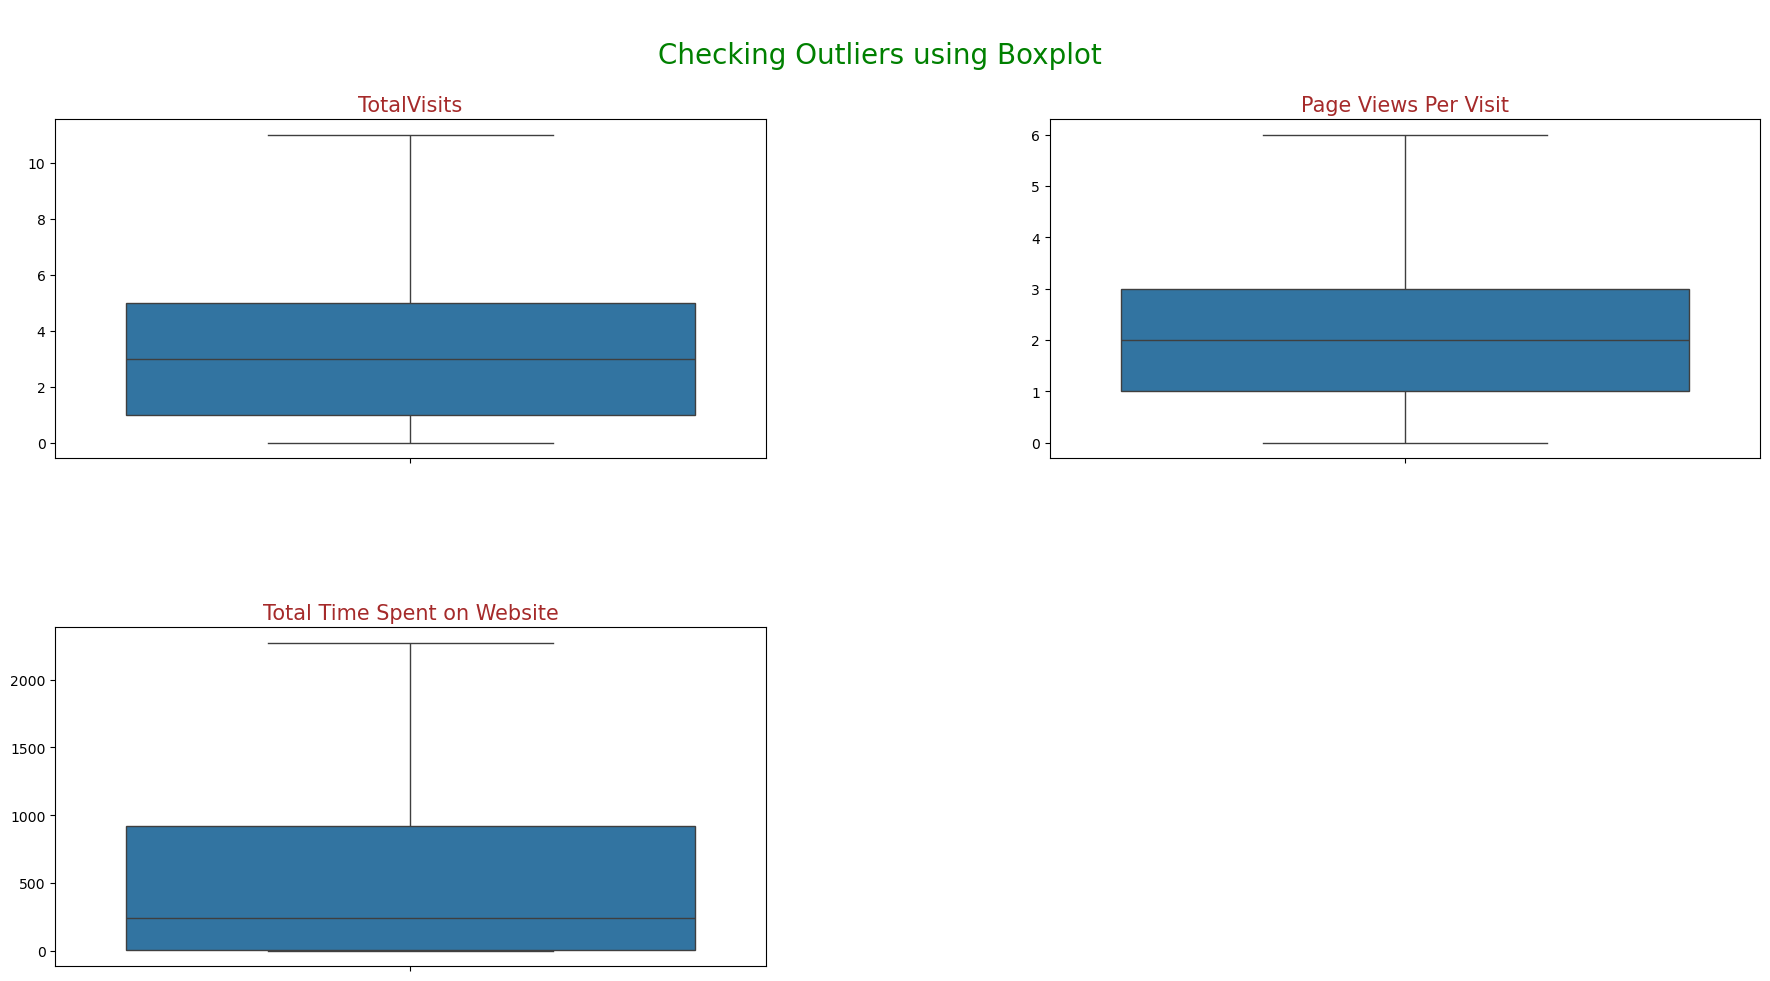

In [51]:
# Again checking after outlier treatment
plt.figure(figsize=[22,11])
plt.subplots_adjust(wspace=0.4, hspace=0.5)
columnList = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
# Loop over the list of columns
for i, column_name in enumerate(columnList):
    # Create a subplot for each column
    plt.subplot(2, 2, i + 1)
    
    # Create a boxplot for the current column
    sns.boxplot(y=df_leads[column_name])
    
    # Set the title of the entire figure
    plt.suptitle("\nChecking Outliers using Boxplot", fontsize=20, color="green")
    
    # Remove the y-axis label
    plt.ylabel(None)
    
    # Set the title of the individual subplot
    plt.title(column_name, fontsize=15, color='brown')

# Show the plot
plt.show()

In [52]:
# value counts for "Lead Source"
df_leads["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google               31.824673
Direct Traffic       27.935845
Olark Chat           19.257388
Organic Search       12.677139
Reference             4.866528
Welingak Website      1.417115
Referral Sites        1.373174
Facebook              0.340547
bing                  0.065912
google                0.054927
Click2call            0.043942
Press_Release         0.021971
Social Media          0.021971
Live Chat             0.021971
youtubechannel        0.010985
testone               0.010985
Pay per Click Ads     0.010985
welearnblog_Home      0.010985
WeLearn               0.010985
blog                  0.010985
NC_EDM                0.010985
Name: proportion, dtype: float64

> Here, we can see that "Google" and "google" both are present so, we will replace it with "Google".And also the levels in "Lead Source" are having very less percentage of values so, will group them in a single level named "others" as during dummy variable creation so many levels will create problem. 

In [54]:
# Grouping low frequency value levels to Others
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [55]:
# value counts for "Lead Source"
df_leads["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              31.879600
Direct Traffic      27.935845
Olark Chat          19.257388
Organic Search      12.677139
Reference            4.866528
Welingak Website     1.417115
Referral Sites       1.373174
Facebook             0.340547
Others               0.252664
Name: proportion, dtype: float64

In [56]:
# value counts for "Last Activity"
df_leads['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                    37.756783
SMS Sent                        30.077996
Olark Chat Conversation         10.677799
Page Visited on Website          7.030649
Converted to Lead                4.701747
Email Bounced                    3.427442
Email Link Clicked               2.933099
Form Submitted on Website        1.274305
Unreachable                      0.988685
Unsubscribed                     0.670109
Had a Phone Conversation         0.274635
View in browser link Clicked     0.065912
Approached upfront               0.054927
Email Received                   0.021971
Email Marked Spam                0.021971
Visited Booth in Tradeshow       0.010985
Resubscribed to emails           0.010985
Name: proportion, dtype: float64

> Some of the levels in "Last Activity" are having very less percentage of values so, will group them in a single level named "others" as during dummy variable creation so many levels will create problem. 

In [58]:
# Grouping low frequency value levels to Others 
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [59]:
# value counts for "Last Activity"
df_leads['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 37.756783
SMS Sent                     30.077996
Olark Chat Conversation      10.677799
Page Visited on Website       7.030649
Converted to Lead             4.701747
Email Bounced                 3.427442
Email Link Clicked            2.933099
Others                        2.120180
Form Submitted on Website     1.274305
Name: proportion, dtype: float64

In [60]:
# Checking datatypes of columns
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
 10  Last Notable Activity                   9103 non-null   object 
d

> Now, our data is clean and we can proceed with EDA.

## Step 3: EDA

### Checking if Data is Imbalanced or not
- Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset
- Data imbalance is in the context of Target variable only
- `Target variable` is `'Converted'` which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted 

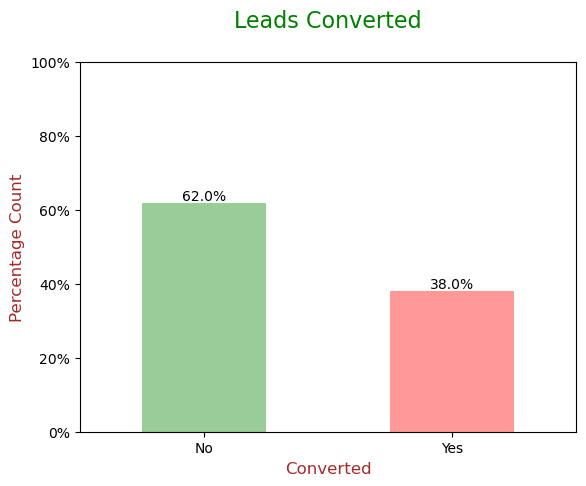

In [64]:
## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()


- **Conversion rate is of 38.5%**, meaning only 38.5% of the people have converted to leads.(Minority)
- While 61.5% of the people didnt convert to leads. (Majority)

In [66]:
### Ratio of Data Imbalance
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio :",ratio)

Data Imbalance Ratio : 1.6301646922854667


> Data is moderately imbalance

#### Univariate Analysis

In [69]:
df_leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [70]:
# List of Categorical columns
cat_cols=["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation",
          "A free copy of Mastering The Interview","Last Notable Activity"]

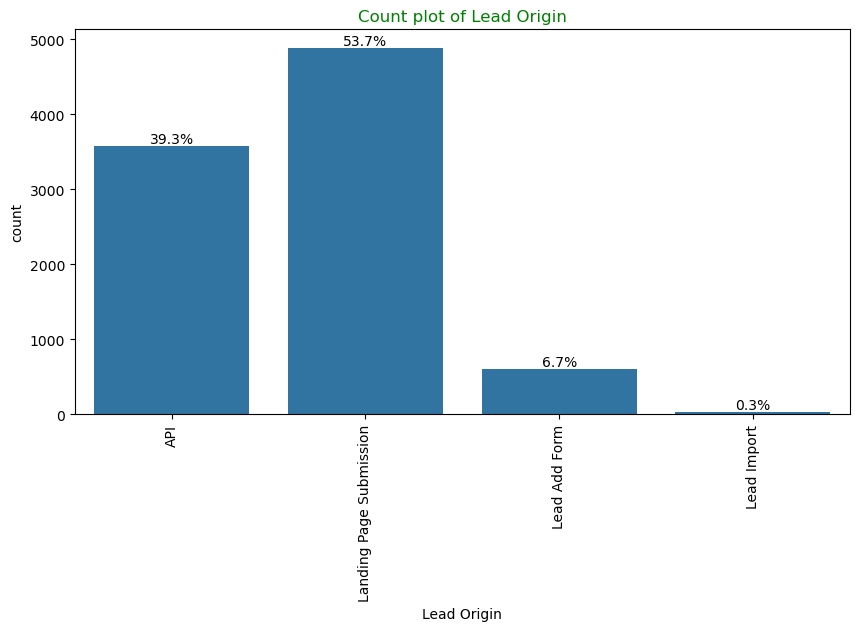

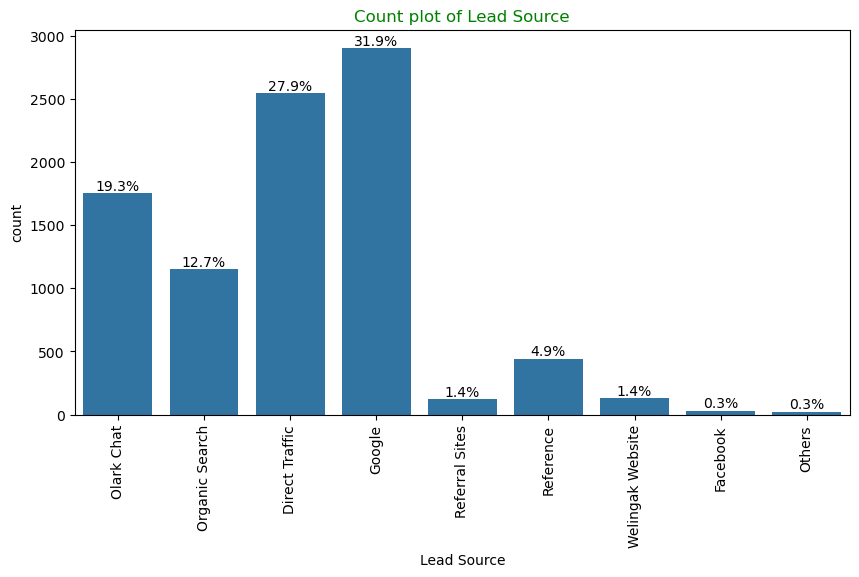

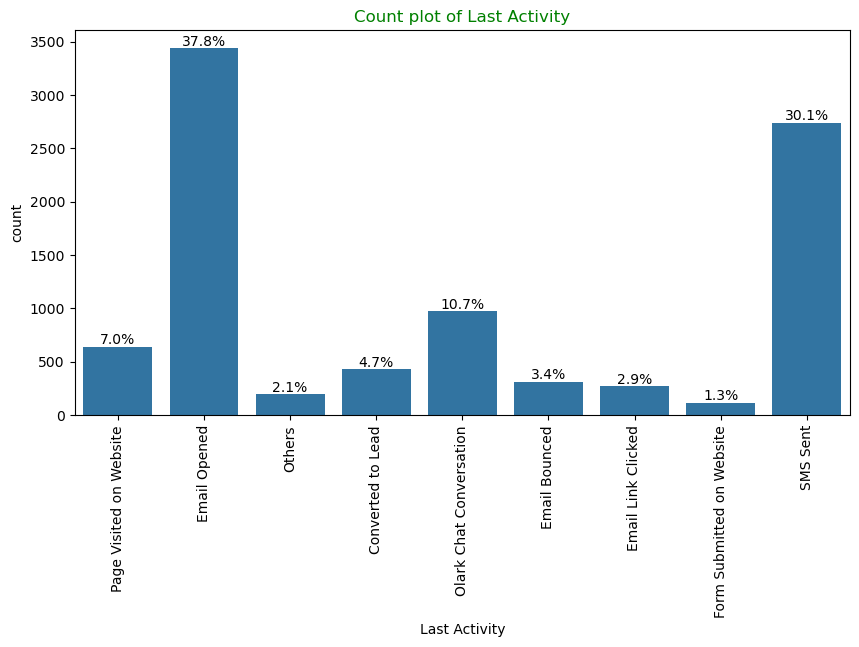

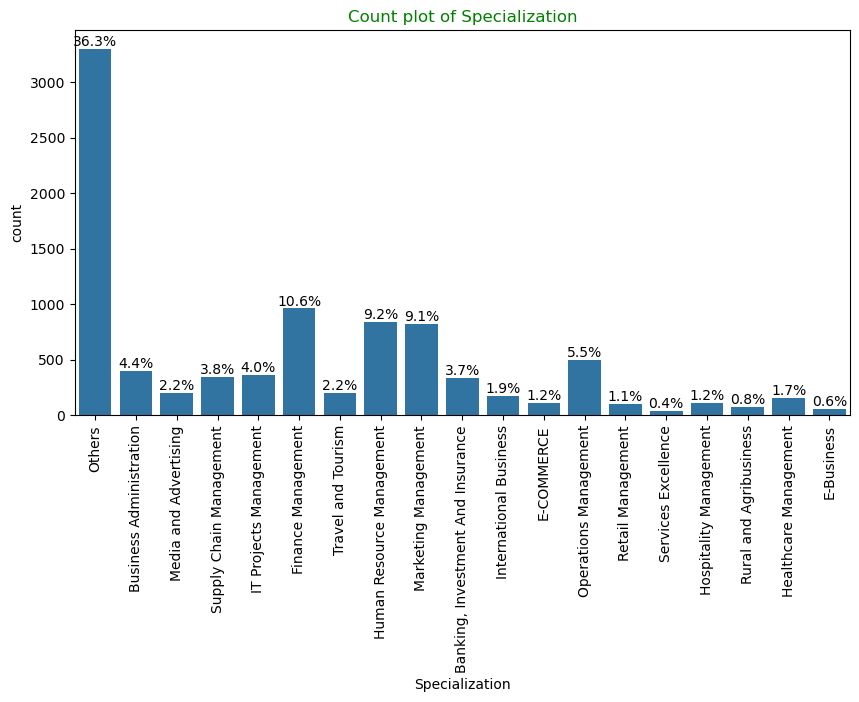

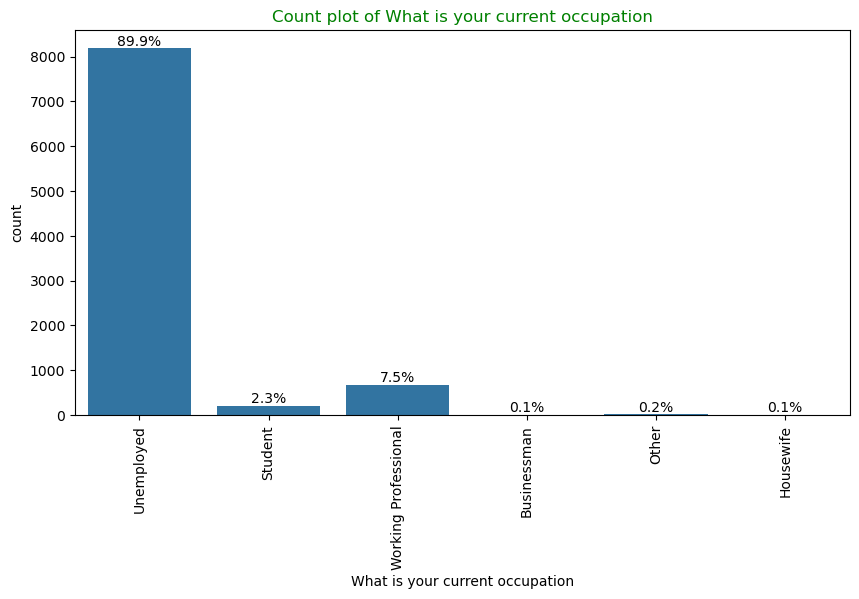

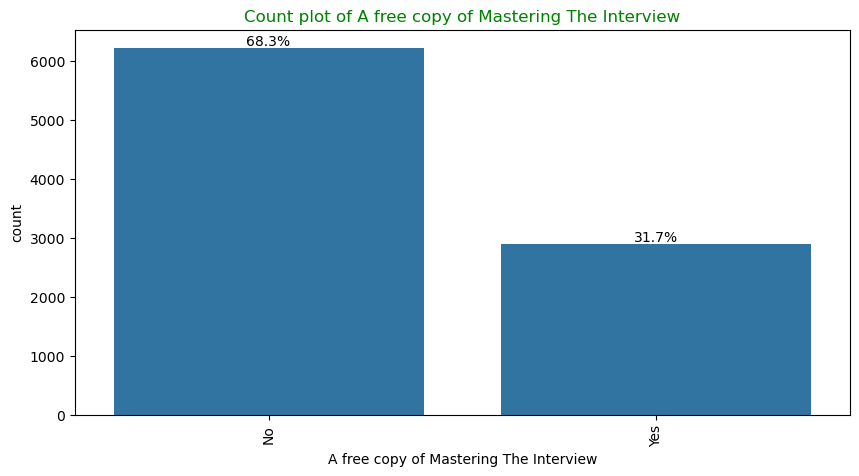

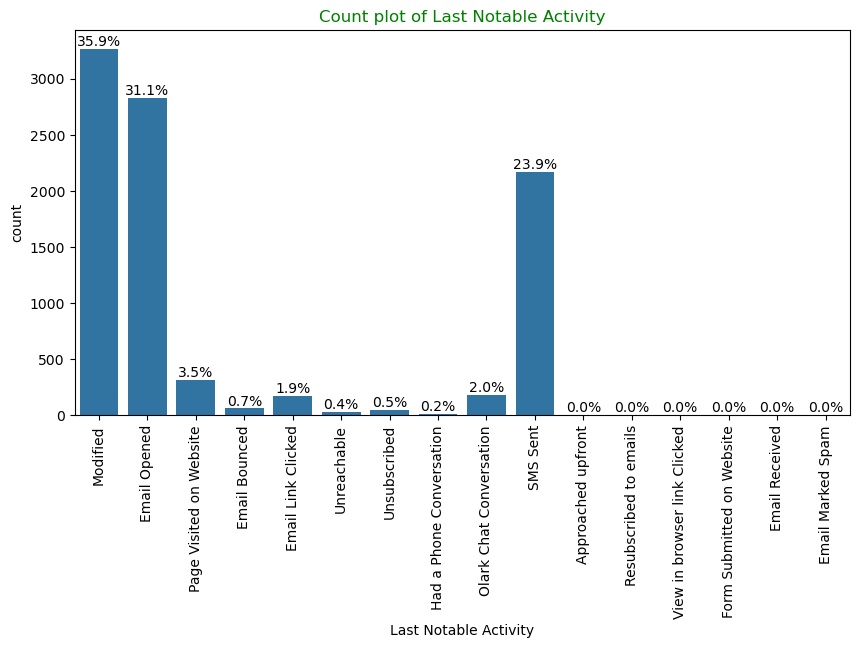

In [71]:
for i in cat_cols:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

#### Bivariate for categorical columns

In [73]:
def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)
    
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for p in bars:
            total = sum(p.get_height() for p in bars)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

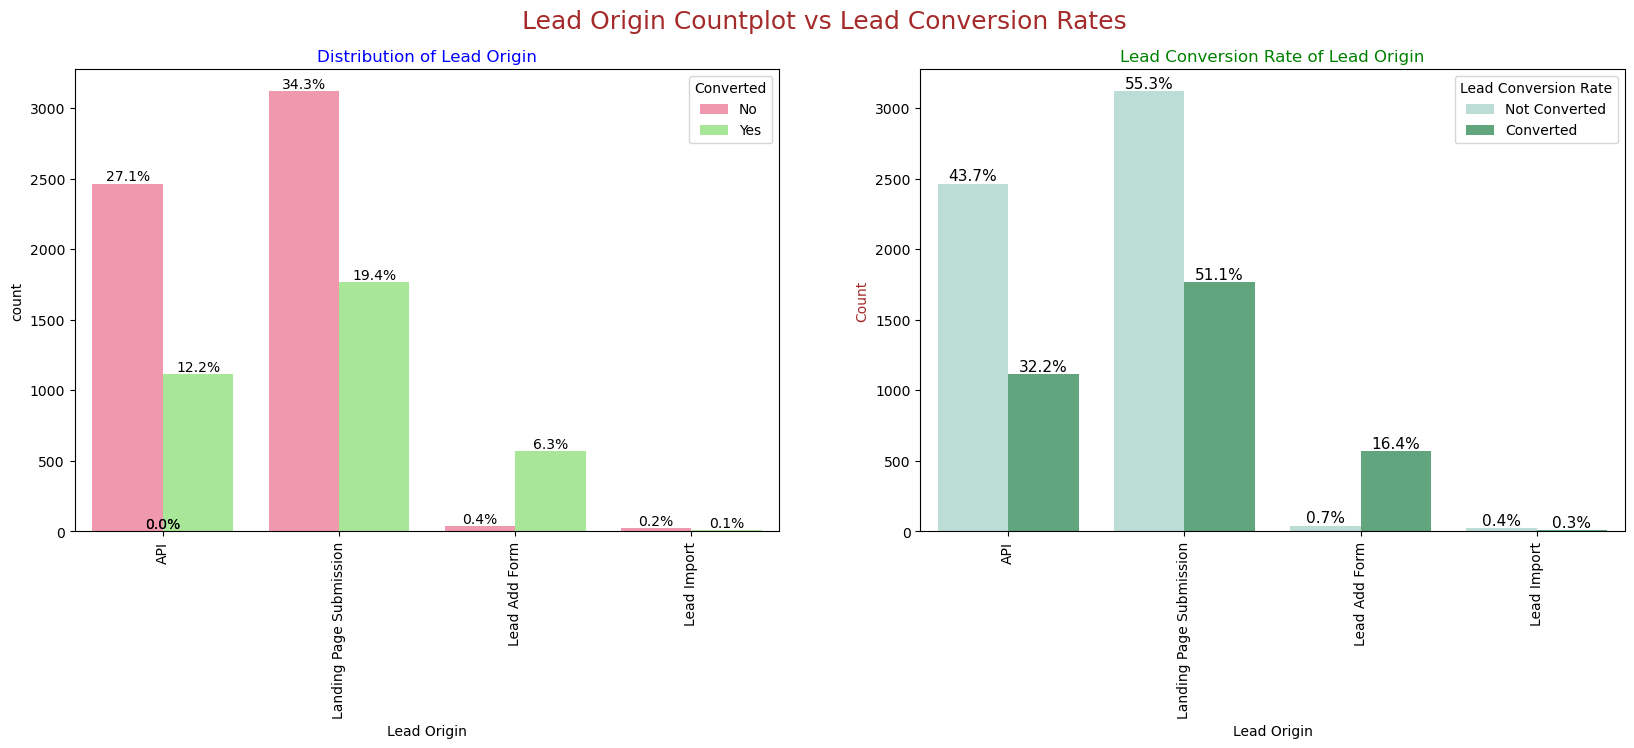

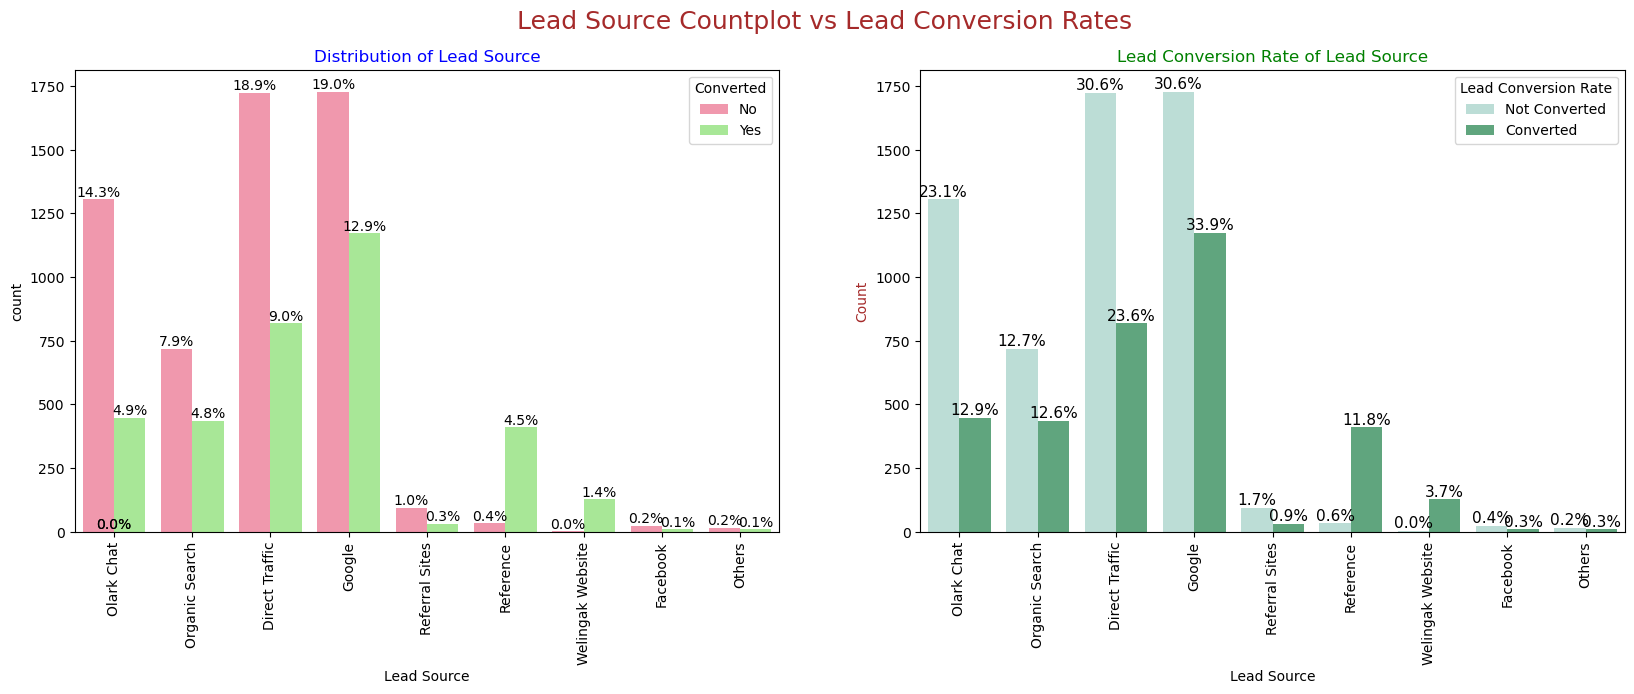

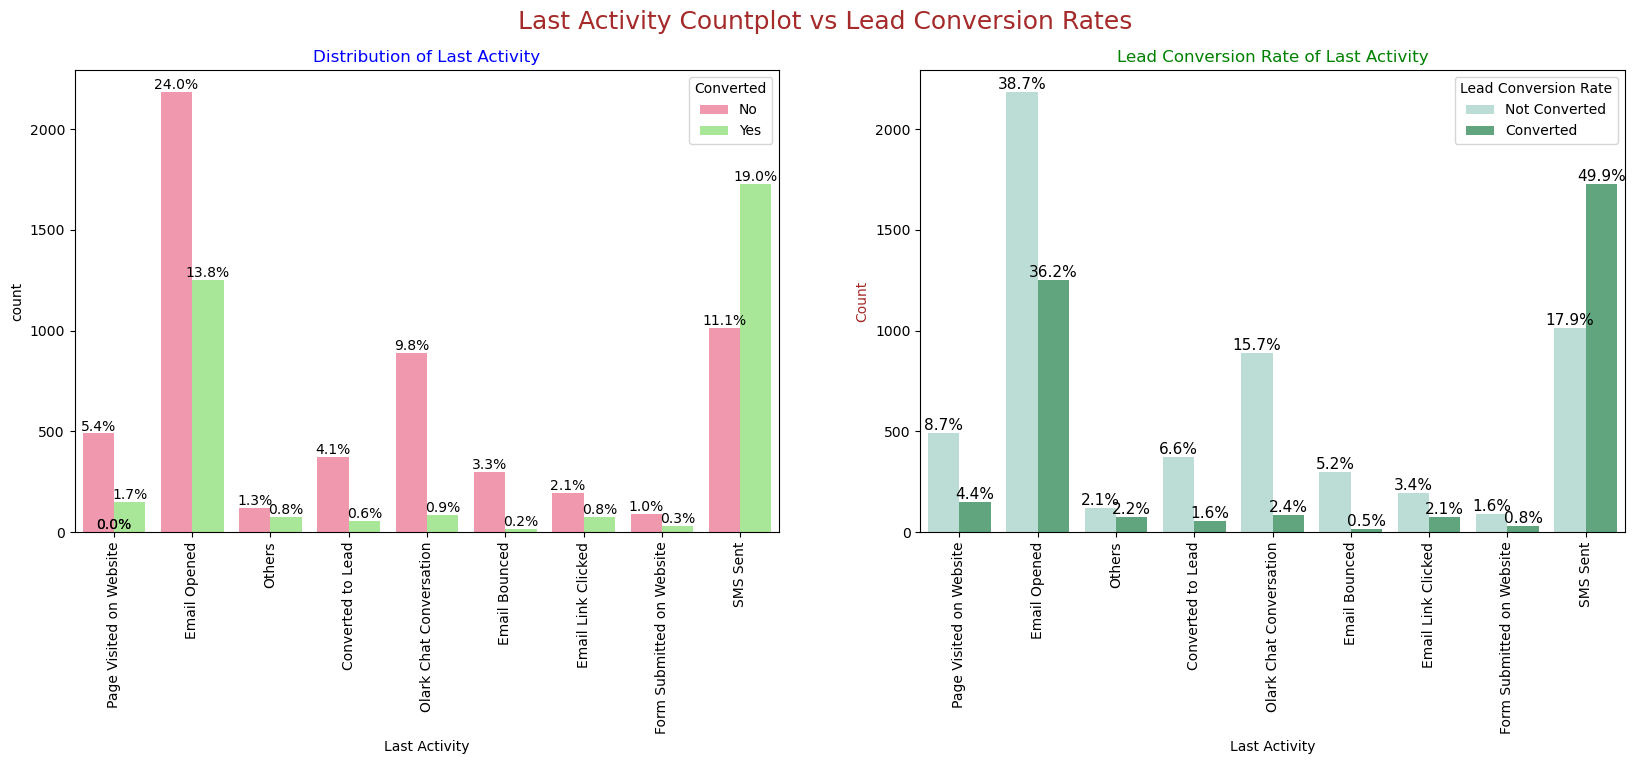

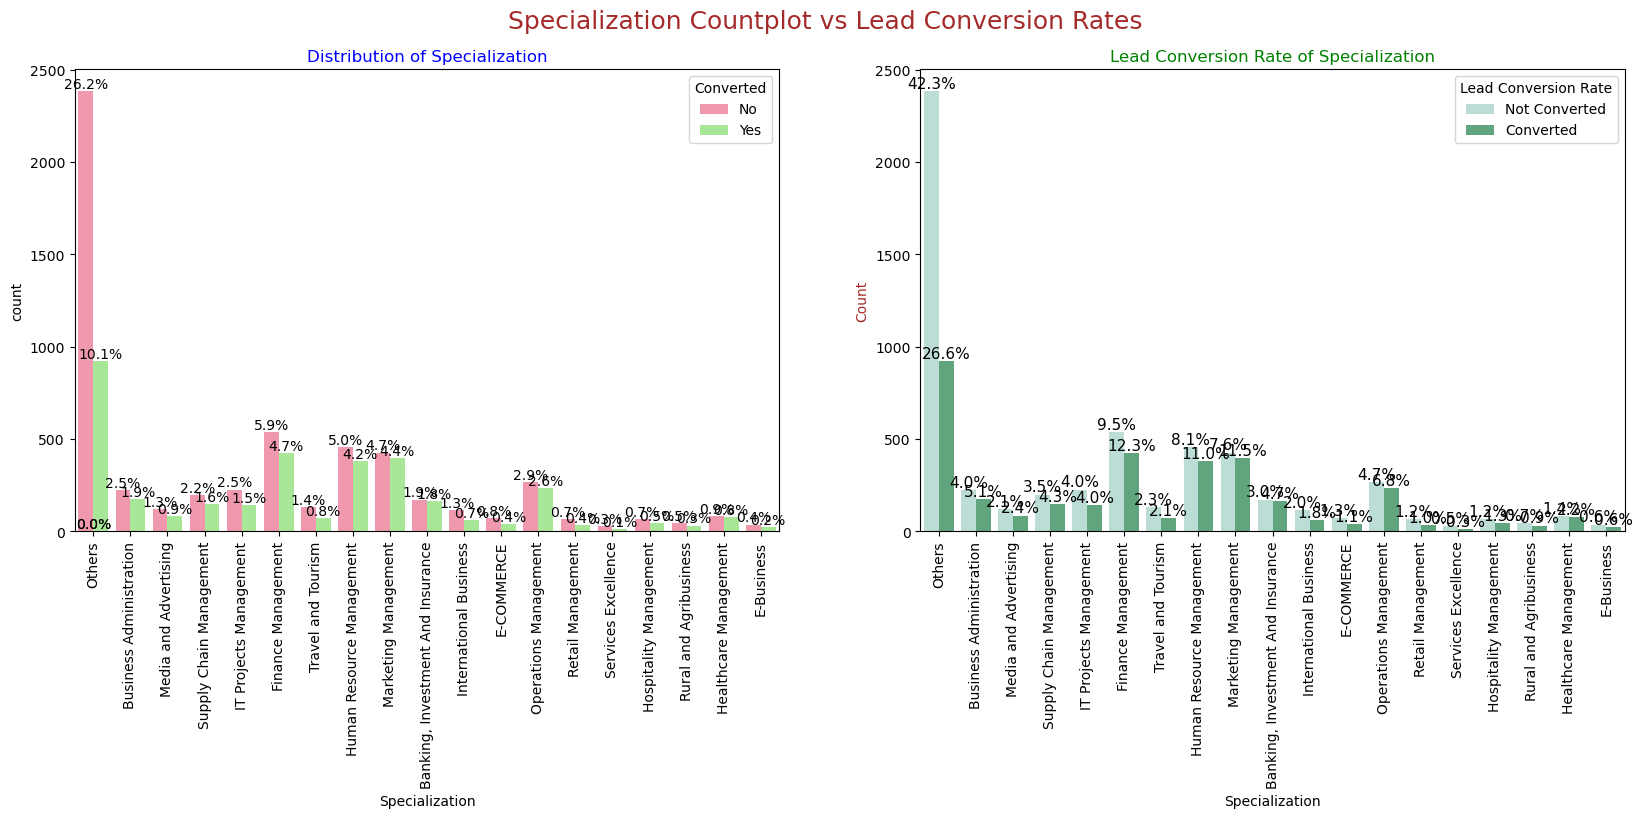

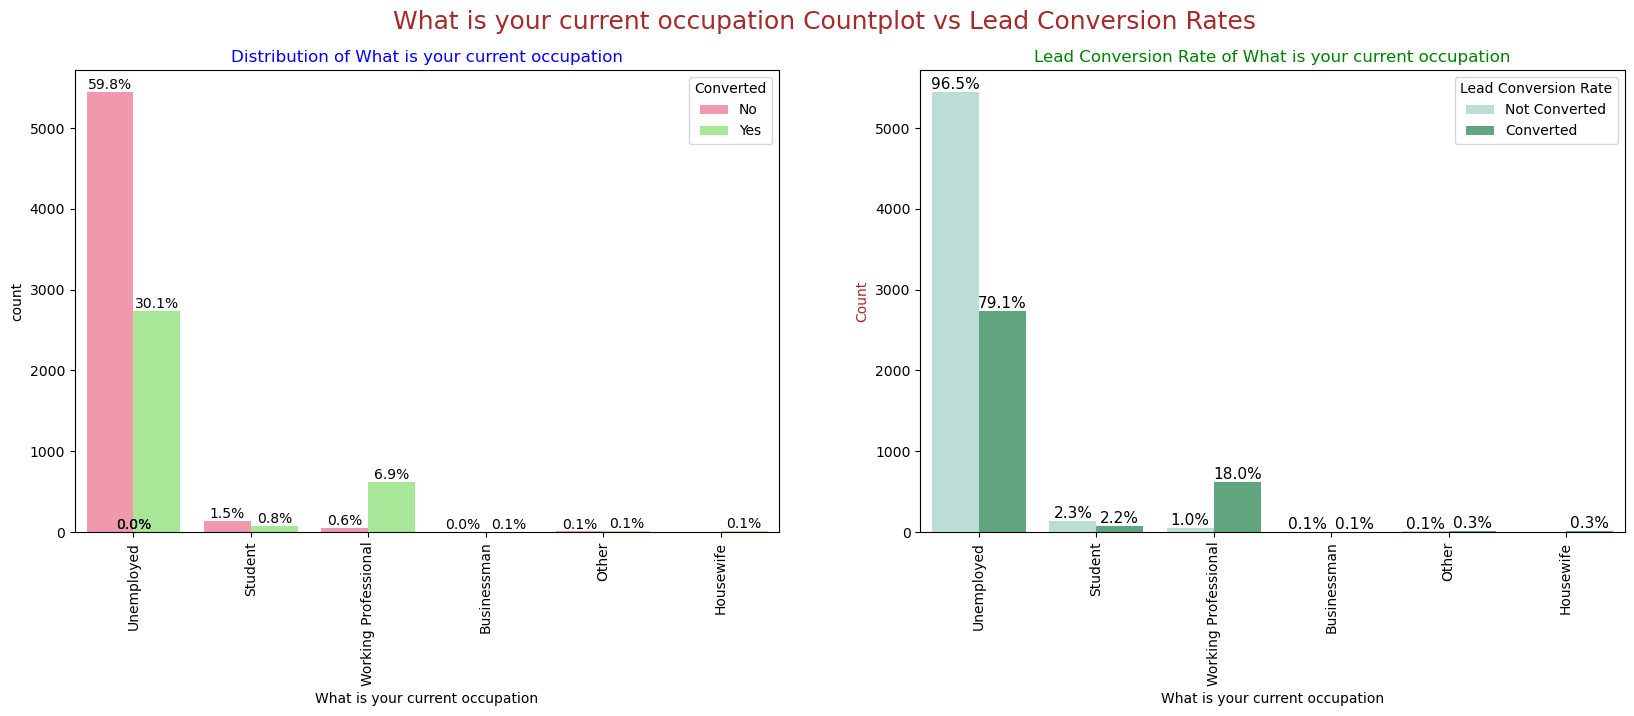

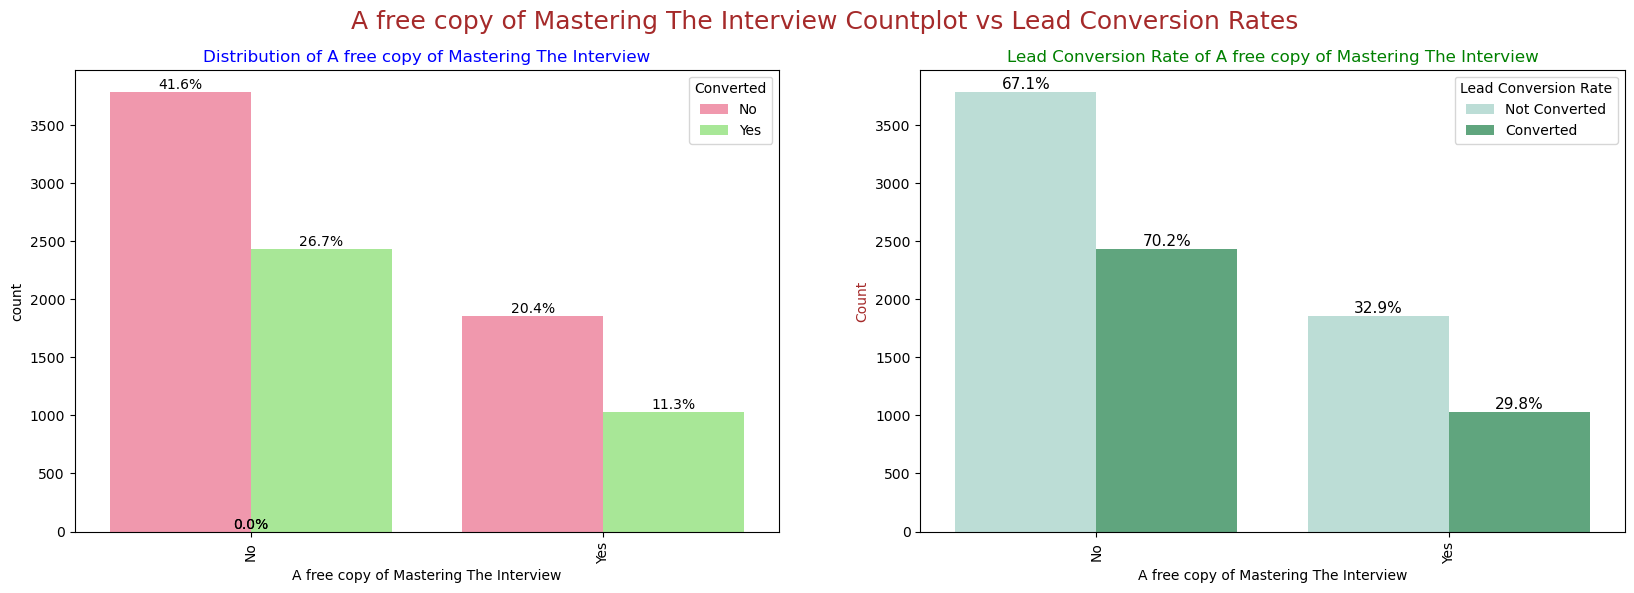

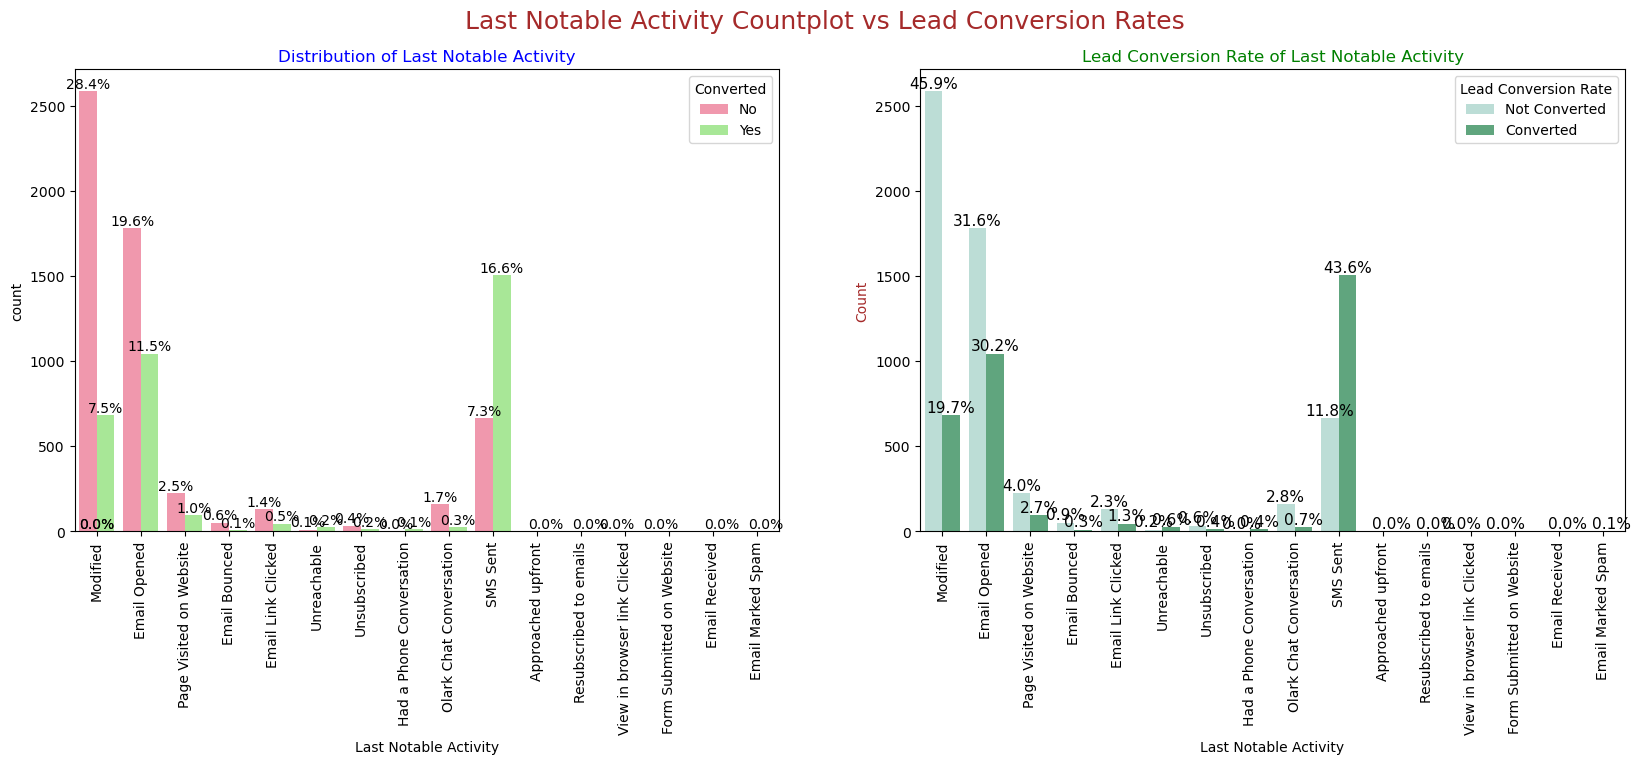

In [74]:
for col in cat_cols:
    Bivariate_cat(df_leads,col)

> In Lead Origin,conversion rate for `Lead Add Form` is very high.

> In Lead Source,conversion rate for `Reference` is very high.

> In What is your current occupation,conversion rate for `Working professional` is quite high.

> In Last Notable Activity,conversion rate for `SMS Sent` is high.   

#### Bivariate Analysis for Numerical columns

<Figure size 1600x400 with 0 Axes>

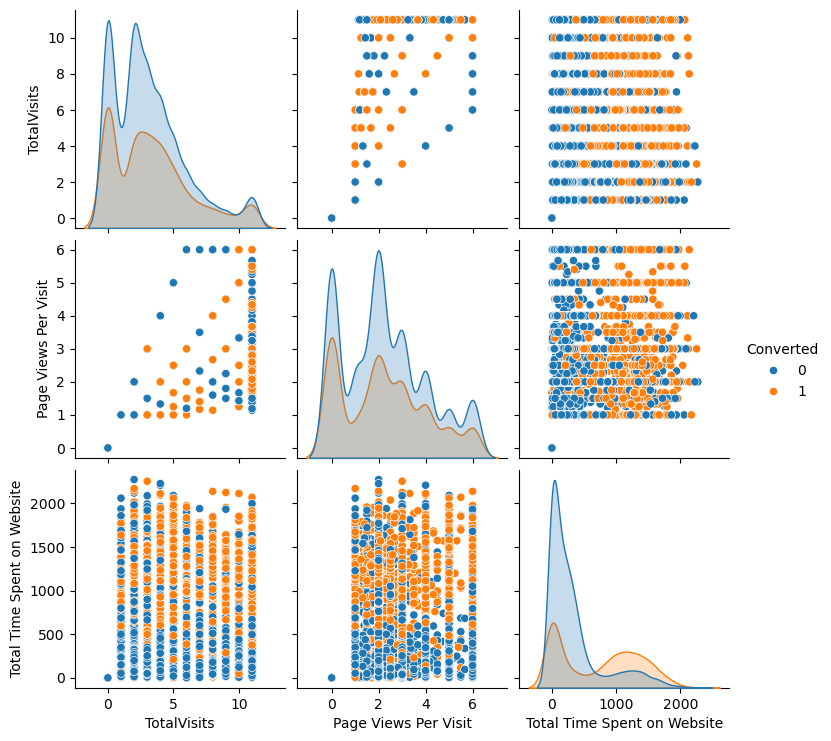

In [77]:
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

In [78]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

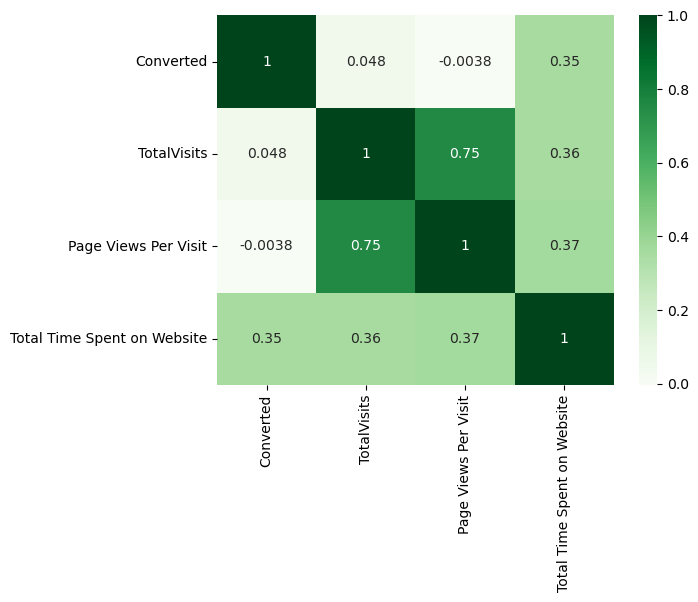

In [79]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Greens",annot=True)
plt.show()

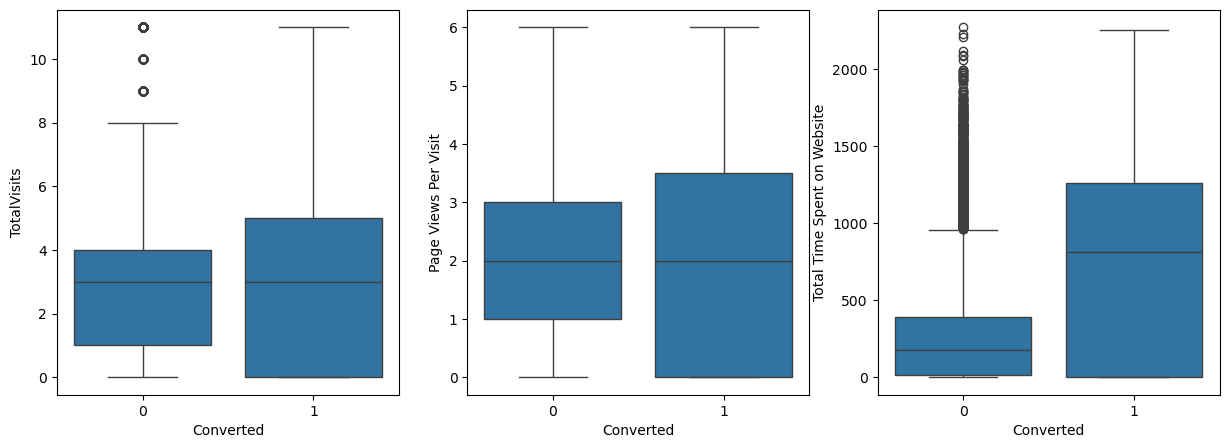

In [80]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

## Step 4: Data Preparation

In [82]:
# Mapping binary categorical variables (Yes/No to 1/0) 

df_leads["A free copy of Mastering The Interview"] = df_leads["A free copy of Mastering The Interview"].apply(lambda x: 1 if x =='Yes' else 0)

#### Dummy Variables
-For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [84]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy= pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"
                                    ,"Last Notable Activity"]],dtype="int", drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [85]:
df_leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

   A free copy of Mastering The Interview Last Notable Activity  \
0                                       0              Modified   
1                                       0          Email Opened   
2                                       1          Email Opened   
3                                       0              Modified   
4                                       0              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                             

In [86]:
# We have created dummies for the below variables, so we can drop them
df_leads=df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation",
                        "Last Notable Activity"],axis=1)

In [87]:
df_leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1    

In [88]:
df_leads.shape

(9103, 62)

In [89]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 62 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9103 non-null   int64  
 1   TotalVisits                                           9103 non-null   float64
 2   Total Time Spent on Website                           9103 non-null   int64  
 3   Page Views Per Visit                                  9103 non-null   float64
 4   A free copy of Mastering The Interview                9103 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9103 non-null   int32  
 6   Lead Origin_Lead Add Form                             9103 non-null   int32  
 7   Lead Origin_Lead Import                               9103 non-null   int32  
 8   Lead Source_Facebook                                  9103 non-

## Step 5: Train-Test Split

In [91]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]

In [92]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [93]:
print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

X_train shape : (6372, 61)
X_test shape : (2731, 61)
y_train shape : (6372,)
y_test shape : (2731,)


## Step 6: Scaling

In [95]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [96]:
# X-train dataframe after standard scaling
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7962    -0.079783                     1.476324             -0.423364   
5520     1.299804                    -0.771066              2.083179   
1962     0.610010                    -0.571257              0.133646   
1566     2.679391                     1.393834              0.690655   
9170    -1.114473                    -0.881052             -1.258878   

      A free copy of Mastering The Interview  \
7962                               -0.681042   
5520                               -0.681042   
1962                               -0.681042   
1566                               -0.681042   
9170                               -0.681042   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7962                                    1                          0   
5520                                    1                          0   
1962                                    1                          0   
1566                                    1                          0   
9170                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
7962                        0                     0                   1   
5520                        0                     0                   0   
1962                        0                     0                   1   
1566                        0                     0                   1   
9170                        0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
7962                       0                           0                   0   
5520                       0                           0                   0   
1962                       0                           0                   0   
1566                       0                           0                   0   
9170                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
7962                      0                           0   
5520                      0                           0   
1962                      0                           0   
1566                      0                           0   
9170                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
7962                             0                            0   
5520                             0                            0   
1962                             0                            0   
1566                             0                            0   
9170                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
7962                                 0                           0   
5520                                 0                           1   
1962                                 0                           0   
1566                                 0                           1   
9170                                 0                           1   

      Last Activity_Form Submitted on Website  \
7962                                        0   
5520                                        0   
1962                                        0   
1566                                        0   
9170                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
7962                                      0                     0   
5520                                      0                     0   
1962                                      0                     0   
1566                                      0                     0   
9170                                      0                     0   

      Last Activity_Page Visit

In [97]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
print("The Conversion Rate is ",LCR)

The Conversion Rate is  38.02043282434362


### Correlation matrix

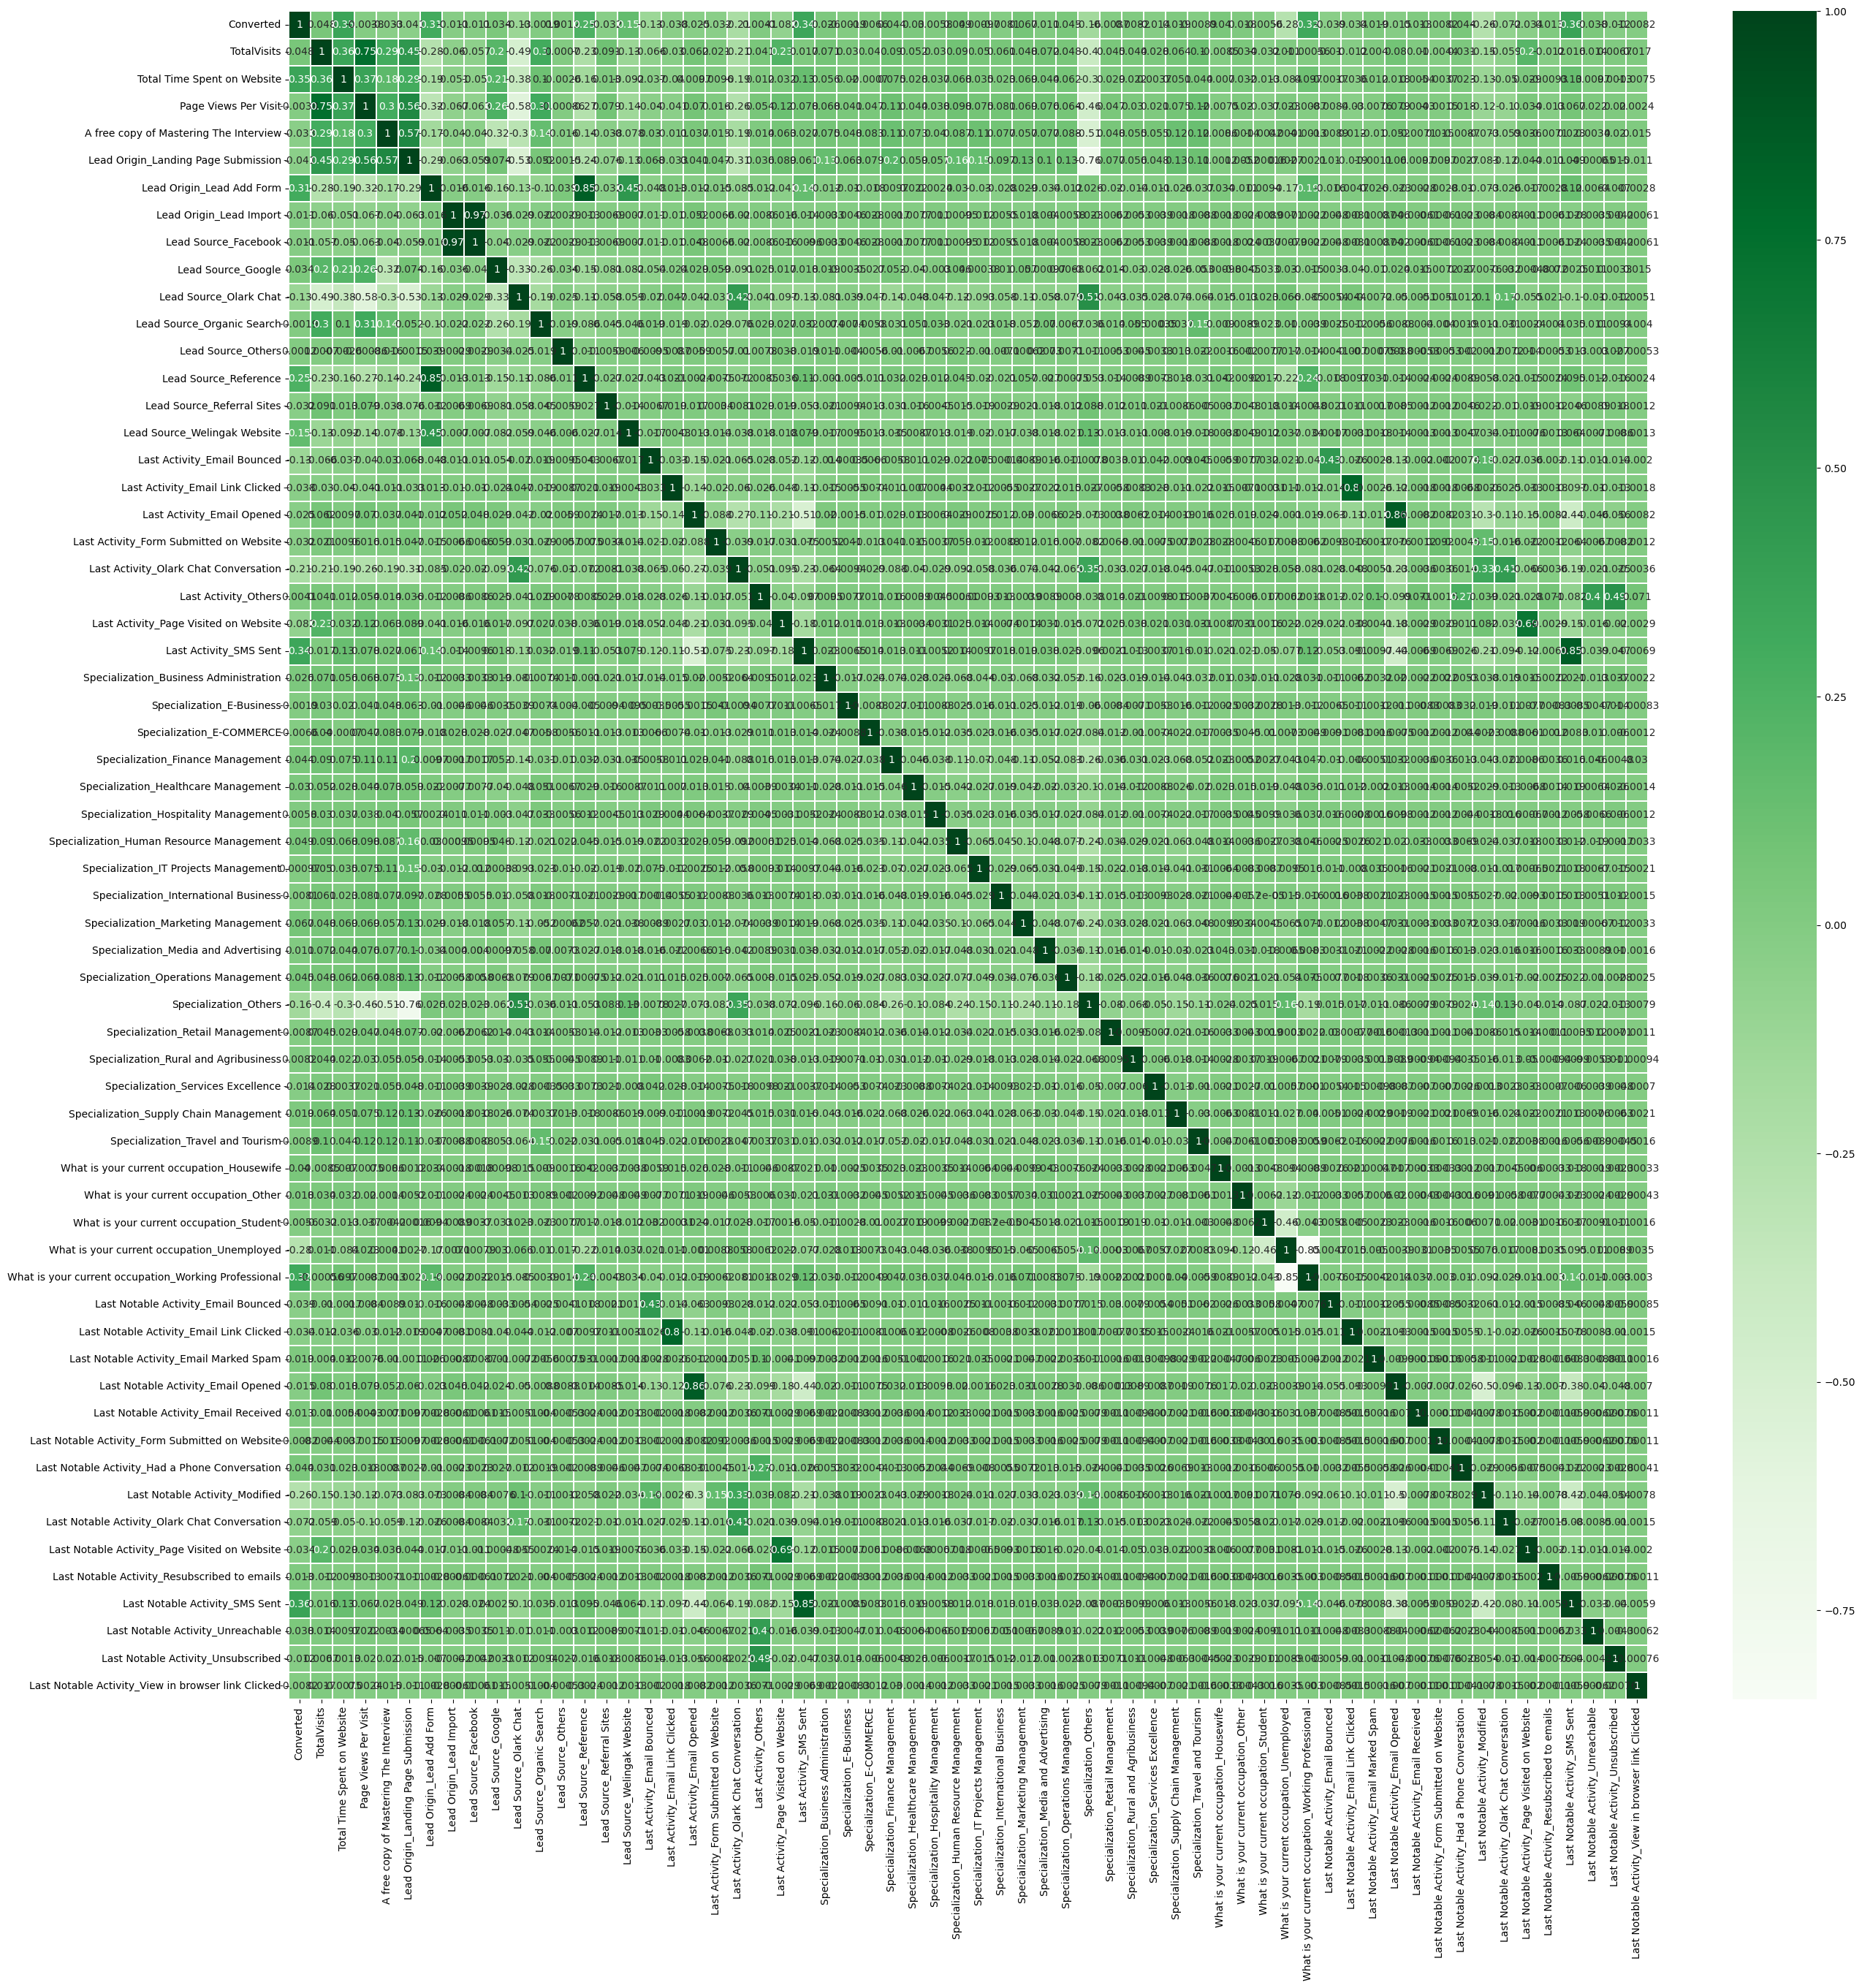

In [99]:
# analyse correlation matrix
plt.figure(figsize = (30,30))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Greens",annot=True)
plt.show()

In [100]:
df_leads.corr()

Converted  TotalVisits  \
Converted                                            1.000000     0.047525   
TotalVisits                                          0.047525     1.000000   
Total Time Spent on Website                          0.354939     0.356565   
Page Views Per Visit                                -0.003800     0.753938   
A free copy of Mastering The Interview              -0.033079     0.294603   
Lead Origin_Landing Page Submission                 -0.040698     0.445684   
Lead Origin_Lead Add Form                            0.306224    -0.276255   
Lead Origin_Lead Import                             -0.010824    -0.060099   
Lead Source_Facebook                                -0.010824    -0.057482   
Lead Source_Google                                   0.033821     0.201858   
Lead Source_Olark Chat                              -0.125395    -0.489758   
Lead Source_Organic Search                          -0.001874     0.301606   
Lead Source_Others                                   0.001151     0.000702   
Lead Source_Reference                                0.254067    -0.233652   
Lead Source_Referral Sites                          -0.032135     0.090875   
Lead Source_Welingak Website                         0.149250    -0.125617   
Last Activity_Email Bounced                         -0.127649    -0.065975   
Last Activity_Email Link Clicked                    -0.038243    -0.030484   
Last Activity_Email Opened                          -0.025097     0.062004   
Last Activity_Form Submitted on Website             -0.032491     0.020868   
Last Activity_Olark Chat Conversation               -0.209246    -0.214232   
Last Activity_Others                                 0.004117     0.040861   
Last Activity_Page Visited on Website               -0.081726     0.229445   
Last Activity_SMS Sent                               0.338020     0.017268   
Specialization_Business Administration               0.025754     0.070565   
Specialization_E-Business                           -0.001927     0.030166   
Specialization_E-COMMERCE                           -0.006604     0.040468   
Specialization_Finance Management                    0.043609     0.090112   
Specialization_Healthcare Management                 0.030085     0.051639   
Specialization_Hospitality Management                0.005768     0.030047   
Specialization_Human Resource Management             0.048835     0.090201   
Specialization_IT Projects Management                0.000974     0.050112   
Specialization_International Business               -0.008079     0.060952   
Specialization_Marketing Management                  0.066812     0.047983   
Specialization_Media and Advertising                 0.011059     0.071796   
Specialization_Operations Management                 0.044595     0.047796   
Specialization_Others                               -0.158220    -0.396019   
Specialization_Retail Management                    -0.008729     0.045326   
Specialization_Rural and Agribusiness                0.008234     0.043550   
Specialization_Services Excellence                  -0.014398     0.028341   
Specialization_Supply Chain Management               0.019467     0.063525   
Specialization_Travel and Tourism                   -0.008912     0.100265   
What is your current occupation_Housewife            0.040166    -0.008474   
What is your current occupation_Other                0.018395     0.034484   
What is your current occupation_Student             -0.005620    -0.031885   
What is your current occupation_Unemployed          -0.280294     0.010837   
What is your current occupation_Working Profess...   0.315113    -0.000559   
Last Notable Activity_Email Bounced                 -0.038628    -0.010007   
Last Notable Activity_Email Link Clicked            -0.034432    -0.012056   
Last Notable Activity_Email Marked Spam              0.018927     0.004009   
Last Notable Activity_Email Opened                  -0.015081     0.079923

> As above correlation matrix have many columns , so it became difficult to interpret.Hence, Finding Top_10 correlations.

In [102]:
# Calculate the correlation matrix
corr_matrix = df_leads.corr()

# Create a DataFrame to store the correlations with their pairs
corr_pairs = []

# Iterate over the matrix to get unique pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        colname1 = corr_matrix.columns[i]
        colname2 = corr_matrix.columns[j]
        correlation = corr_matrix.iloc[i, j]
        corr_pairs.append((colname1, colname2, correlation))

# Convert the list of tuples to a DataFrame
corr_pairs_df = pd.DataFrame(corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

# Sort by absolute value of the correlation in descending order and get top 10
top_10_corr = corr_pairs_df.reindex(corr_pairs_df['Correlation'].abs().sort_values(ascending=False).index).head(10)

print(top_10_corr)

                                             Variable 1  \
35                                 Lead Source_Facebook   
1243                 Last Notable Activity_Email Opened   
1676                     Last Notable Activity_SMS Sent   
1080  What is your current occupation_Working Profes...   
84                                Lead Source_Reference   
1145           Last Notable Activity_Email Link Clicked   
635                               Specialization_Others   
4                                  Page Views Per Visit   
1562      Last Notable Activity_Page Visited on Website   
48                               Lead Source_Olark Chat   

                                      Variable 2  Correlation  
35                       Lead Origin_Lead Import     0.967632  
1243                  Last Activity_Email Opened     0.861728  
1676                      Last Activity_SMS Sent     0.853521  
1080  What is your current occupation_Unemployed    -0.847742  
84                     Lead Or

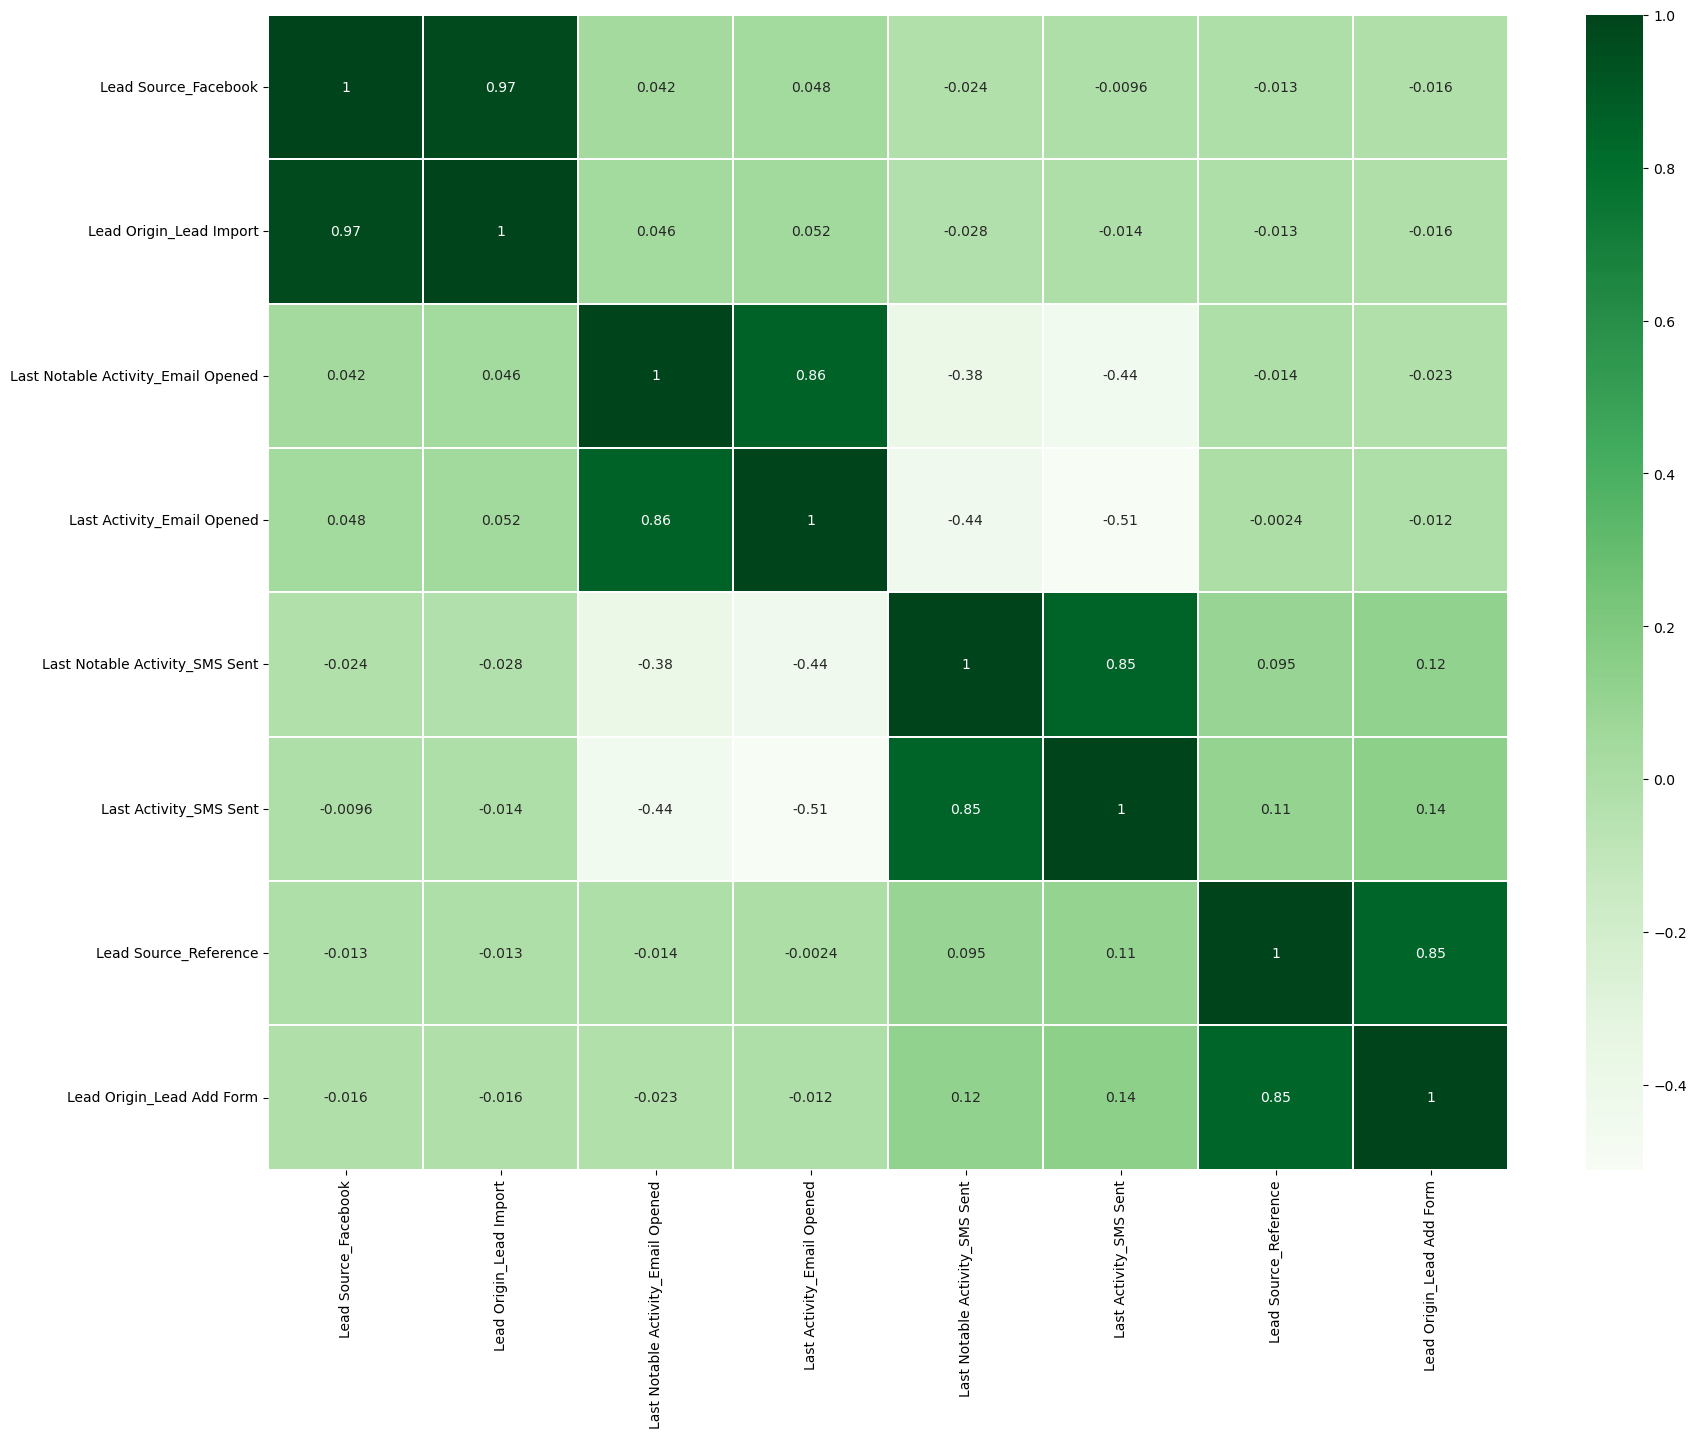

In [103]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Last Notable Activity_Email Opened",
                      "Last Activity_Email Opened","Last Notable Activity_SMS Sent","Last Activity_SMS Sent",
                      "Lead Source_Reference","Lead Origin_Lead Add Form"]].corr(),linewidths=0.01,cmap="Greens",annot=True)
plt.show()

> As there is high correlation between the variables it will be better if we drop the variables with high correlation.

In [105]:
X_test = X_test.drop(["Lead Origin_Lead Import","Lead Origin_Lead Add Form","Last Notable Activity_SMS Sent","Last Notable Activity_Email Opened"],axis=1)

X_train = X_train.drop(["Lead Origin_Lead Import","Lead Origin_Lead Add Form","Last Notable Activity_SMS Sent","Last Notable Activity_Email Opened"],axis=1)


## Step 7: Model Building

- We will Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

In [108]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [109]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 34),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 9),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 4),
 ('Last Activity_Page Visited on Website', False, 20),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 27),
 ('Specialization_E-Business', True

In [ ]:
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
33                              Specialization_Others            True        1
49     Last Notable Activity_Had a Phone Conversation            True        1
17              Last Activity_Olark Chat Conversation            True        1
50                     Last Notable Activity_Modified            True        1
43  What is your current occupation_Working Profes...            True        1
13                        Last Activity_Email Bounced            True        1
12                       Lead Source_Welingak Website            True        1
20                             Last Activity_SMS Sent            True        1
10                              Lead Source_Reference            True        1
7                              Lead Source_Olark Chat            True        1
4                 Lead Origin_Landing Page Submission            True        1
54                  Last Notable Activity_Unreachable            True        1
39          What is your current occupation_Housewife            True        1
1                         Total Time Spent on Website            True        1
22                          Specialization_E-Business            True        1
9                                  Lead Source_Others           False        2
55                 Last Notable Activity_Unsubscribed           False        3
18                               Last Activity_Others           False        4
42         What is your current occupation_Unemployed           False        5
41            What is your current occupation_Student           False        6
53       Last Notable Activity_Resubscribed to emails           False        7
26              Specialization_Hospitality Management           False        8
15                         Last Activity_Email Opened           False        9
5                                Lead Source_Facebook           False       10
40              What is your current occupation_Other           False       11
36                 Specialization_Services Excellence           False       12
51      Last Notable Activity_Olark Chat Conversation           False       13
56  Last Notable Activity_View in browser link Cli...           False       14
45           Last Notable Activity_Email Link Clicked           False       15
14                   Last Activity_Email Link Clicked           False       16
2                                Page Views Per Visit           False       17
52      Last Notable Activity_Page Visited on Website           False       18
0                                         TotalVisits           False       19
19              Last Activity_Page Visited on Website           False       20
6                                  Lead Source_Google           False       21
23                          Specialization_E-COMMERCE           False       22
25               Specialization_Healthcare Management           False       23
29              Specialization_International Business           False       24
16            Last Activity_Form Submitted on Website           False       25
31               Specialization_Media and Advertising           False       26
21             Specialization_Business Administration           False       27
11                         Lead Source_Referral Sites           False       28
44                Last Notable Activity_Email Bounced           False       29
32               Specialization_Operations Management           False       30
34                   Specialization_Retail Management           False       31
27           Specialization_Human Resource Management           False       32
24                  Specialization_Finance Management           False       33
3              A free copy of Mastering The Interview           False       34
8                          Lead Source_Organic Search           False       35
35              Specialization_Rural and Agribusiness           False       36
38              

In [ ]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

In [ ]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

In [ ]:
# Function for checking VIF
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_rfe =  X_train[ X_train.columns[rfe.support_] ]
X_train_rfe.head()

In [ ]:
# Function for Modelling
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.GLM(y,X,family=sm.families.Binomial()).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    

## Model 1

In [ ]:
model_1=build_model(X_train_rfe,y_train)

In [ ]:
checkVIF(X_train_rfe)

> Since, p-value for `What is your current occupation_Housewife` is quite high , so we will drop it.

## Model 2

In [ ]:
X_train_rfe=X_train[['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_E-Business', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable']]

In [ ]:
model_2=build_model(X_train_rfe,y_train)

> Since, p-value for `Specialization_E-Business` is quite high , so we will drop it.

## Model 3

In [ ]:
X_train_rfe=X_train[['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
      'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable']]

In [ ]:
model_3=build_model(X_train_rfe,y_train)

In [ ]:
checkVIF(X_train_rfe)

> Since, everything seems good with model_3 as p-value is also less than 0.05 and VIF is also less than 5.So, we will proceed with model_3.

## Step 8: Model Evaluation

In [ ]:
# Getting the predicted values on train data set

In [ ]:
X_train_rfe = sm.add_constant(X_train_rfe) 
model_3 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
y_train_pred=model_3.predict(X_train_rfe)

In [ ]:
y_train_pred[:10]

In [ ]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

> Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities.

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

#### Confusion Matrix

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

In [ ]:
# Above is the confusion matrix when we use threshold of probability as 0.5

#### Accuracy

In [ ]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

#### Metrics beyond simply accuracy

- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

In [ ]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

In [ ]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

#### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

In [ ]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

> Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

#### Finding Optimal Cutoff Point

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

> From the curve above, 0.345 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

In [ ]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

In [ ]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [ ]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

#### Precision and Recall tradeoff

In [ ]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

In [ ]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.45, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

> The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [ ]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [ ]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

In [ ]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

> As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.

> 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345.So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

#### Adding Lead Score Feature to Training dataframe 
- A higher score would mean that the lead is hot, i.e. is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [ ]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

## Step 9: Making Prediction on Test Set

#### Scaling Test data set

In [ ]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test_rfe =X_test[['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
      'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable']]
X_test_rfe.head()

#### Prediction on Test Dataset using final model

In [ ]:
# Adding contant value
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.shape

In [ ]:
# making prediction using model_3 (final model)
y_test_pred = model_3.predict(X_test_rfe)

In [ ]:
# top 10 columns
y_test_pred[:10]

In [ ]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Converted','Converted_Prob'], axis=1)

y_pred_final.head()

In [ ]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

In [ ]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

> Area under ROC curve is 0.89 out of 1 which indicates a good predictive model.

- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set.
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

#### Test set Model Evaluation

In [ ]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

> `For Train Dataset`
- Model Accuracy                   :  0.80
- Model Sensitivity                :  0.80
- Model Specificity                :  0.81
- Model Precision                  :  0.72
- Model Recall                     :  0.80
- Model True Positive Rate (TPR)   :  0.80
- Model False Positive Rate (FPR)  :  0.19

> `For Test Dataset`
- Model Accuracy                   :  0.81
- Model Sensitivity                :  0.82
- Model Specificity                :  0.80
- Model Precision                  :  0.72
- Model Recall                     :  0.82
- Model True Positive Rate (TPR)   :  0.82
- Model False Positive Rate (FPR)  :  0.19


> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both `Test and Train dataset`.

In [ ]:
# features and their coefficicent from final model
parameters=model_3.params.sort_values(ascending=False)
parameters

> A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

#### Adding Lead Score Feature to Testing dataframe 
- A higher score would mean that the lead is hot, i.e. is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [ ]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

- The customers with a higher lead score have a higher conversion chance
- The customers with a lower lead score have a lower conversion chance.

## Conclusion

> `For Train Dataset`
- Model Accuracy                   :  0.80
- Model Sensitivity                :  0.80
- Model Specificity                :  0.81

> `For Test Dataset`
- Model Accuracy                   :  0.81
- Model Sensitivity                :  0.82
- Model Specificity                :  0.80

> The model achieved a sensitivity of 80% in the train set and 82% in the test set, using a cut-off value of 0.345.

>Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting

> The CEO of X Education had set a target sensitivity of around 80%.

>The model also achieved an accuracy of 81%, which is in line with the case study's objective.

#### Top 3 features contributing positively to predicting hot leads in the model are:

#### Recommendations

- More budget/spend can be done on Welingak Website in terms of advertising, etc.- 
Incentives/discounts for providing reference that convert to lead, encourage providing more references
- Focus on features with positive coefficients for targeted marketing strategies.- 
Develop strategies to attract high-quality leads from top-performing lead sources
- Optimize communication channels based on lead engagement impact...